In [1]:
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [ ]:
orders_file = "./sales_2019-01-01_2022-08-16.csv"
scooter_df = pd.read_csv(orders_file, keep_default_na=False) #daily order file
scooter_df['date'] = pd.to_datetime(scooter_df['day'])
scooter_df = scooter_df.sort_values('date')
scooter_df.head()

,product_title,variant_title,variant_sku,shipping_country,product_vendor,shipping_postal_code,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,date
3856,EMOVE Cruiser 52V 1600W Dual Suspension Foldab...,30.5AH (62 miles) / Black,emove-305-black,Switzerland,EMOVE,1290,2019-01-06,1,1899.0,0.0,0.0,1899.0,0.0,1899.0,2019-01-06
3892,EMOVE Cruiser 52V 1600W Dual Suspension Foldab...,30.5AH (62 miles) / Orange,emove-305-orange,Canada,EMOVE,M4E1H1,2019-01-10,1,1899.0,0.0,0.0,1899.0,0.0,1899.0,2019-01-10
5257,EMOVE Cruiser 52V 1600W Dual Suspension Foldab...,26AH (50miles) / Black,emove-26-black,Sweden,EMOVE,11360,2019-01-11,1,1735.0,-173.5,0.0,1561.5,0.0,1561.5,2019-01-11
5258,EMOVE Cruiser 52V 1600W Dual Suspension Foldab...,26AH (50miles) / Black,emove-26-black,Mexico,EMOVE,44380,2019-01-12,1,1735.0,-173.5,0.0,1561.5,0.0,1561.5,2019-01-12
4567,EMOVE Cruiser 52V 1600W Dual Suspension Foldab...,26AH (50miles) / White,emove-26-white,United States,EMOVE,94118,2019-01-17,1,1735.0,0.0,0.0,1735.0,0.0,1735.0,2019-01-17


In [ ]:
df = scooter_df[['product_title', 'date', 'net_quantity']].groupby(['product_title', 'date']).sum().reset_index()
df.head()

,product_title,date,net_quantity
0,DYU D1F Compact Seated Electric Scooter UL2272,2020-11-20,1
1,DYU D1F Compact Seated Electric Scooter UL2272,2020-12-12,1
2,DYU D1F Compact Seated Electric Scooter UL2272,2020-12-14,-1
3,DYU D1F Compact Seated Electric Scooter UL2272,2020-12-18,1
4,DYU D1F Compact Seated Electric Scooter UL2272,2021-01-21,1


In [ ]:
scooter_df[['product_title', 'net_quantity']].groupby(['product_title']).sum().reset_index().sort_values('net_quantity', ascending=False).head(10)

,product_title,net_quantity
16,EMOVE Cruiser 52V 1600W Dual Suspension - Long...,6310
23,EMOVE Touring Portable and Foldable Electric S...,1972
18,EMOVE Cruiser 52V 1600W Dual Suspension Foldab...,1970
34,Kaabo Mantis Pro SE Electric Scooter,1215
59,Wolf King GT Pro Electric Scooter,630
56,Wolf King,594
21,EMOVE RoadRunner,381
35,Kaabo Wolf Warrior 11+ Electric Scooter,325
19,EMOVE Cruiser 52V 1600W Dual Suspension Foldab...,321
58,Wolf King GT Pro,266


In [ ]:
def ith_best_seller(i):
  sum_of_sales_units = scooter_df[['product_title', 'net_quantity']].groupby(['product_title']).sum().reset_index()
  return sum_of_sales_units.sort_values('net_quantity', ascending=False).iloc[i]['product_title']


"""
Data cleaning:
- weekly aggregation
- join same products with different names
- add feature/holiday for weekly aggregated data
- sku (product and color)

Modeling:
- finish prediction for the top2/top3 products (all different colors)
- simple classification algorithm/or manual selection of different types of time series 
(1. ones with abundant and regular data 2. ones with insufficient data and unclear seasonality)
- do different models for different groups of time series 
"""

'\nData cleaning:\n- weekly aggregation\n\nModeling:\n\n'

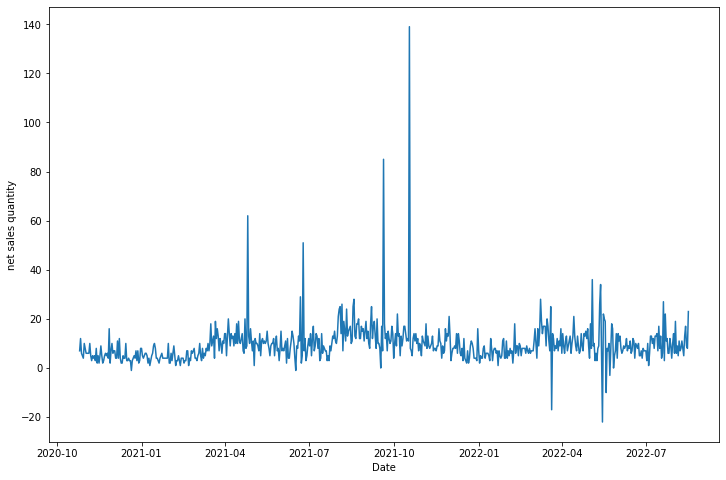

In [ ]:
# Plot scatter
best_seller = ith_best_seller(0)
fig = plt.figure(figsize=(12, 8))
plt.plot(df[df['product_title'] == best_seller]['date'], df[df['product_title'] == best_seller]["net_quantity"])

# Labelling 

plt.xlabel("Date")
plt.ylabel("net sales quantity")

# Display
plt.show()

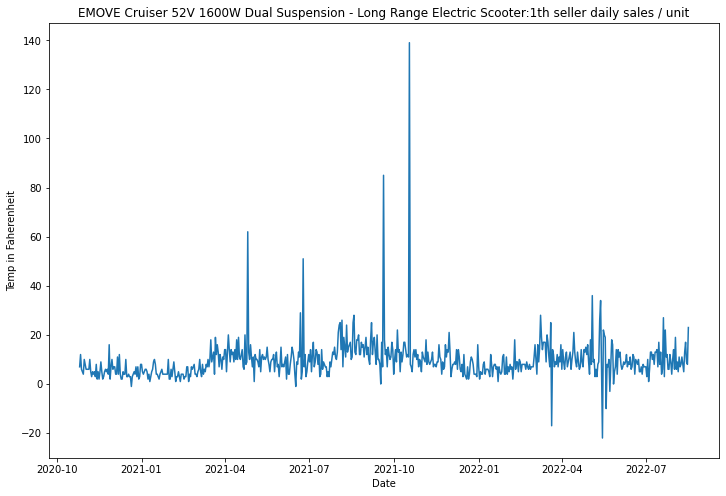

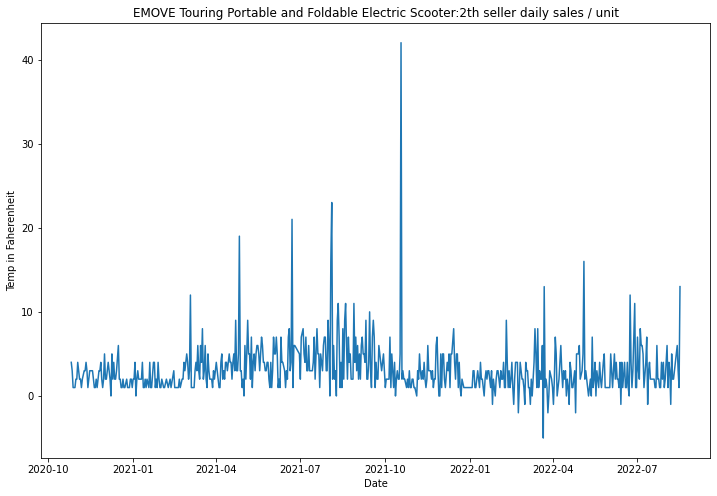

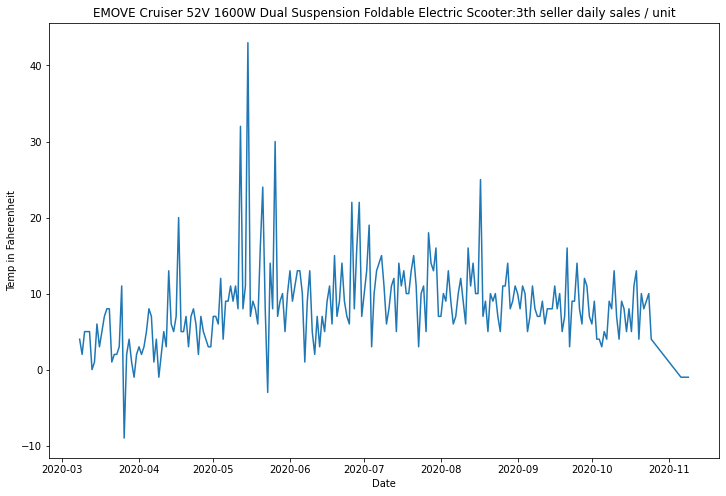

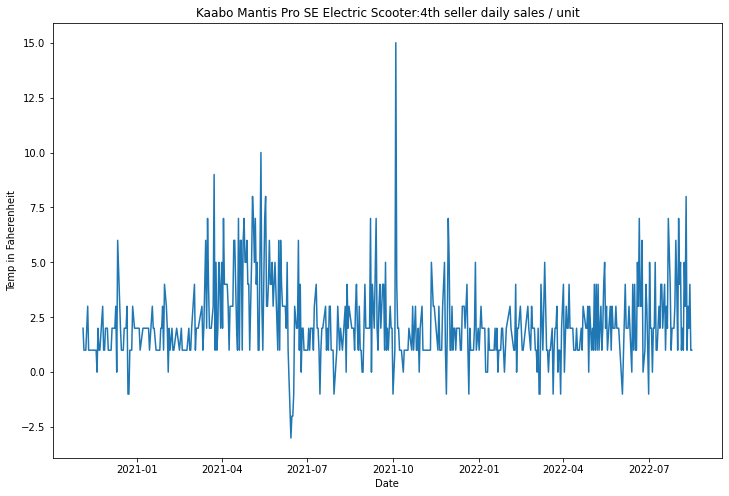

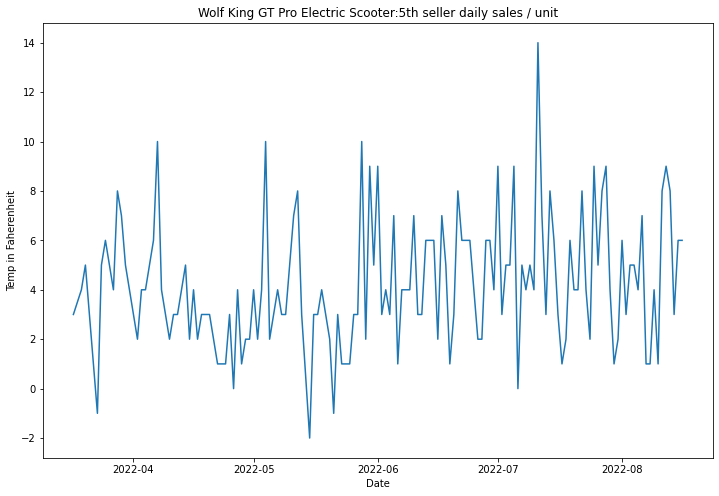

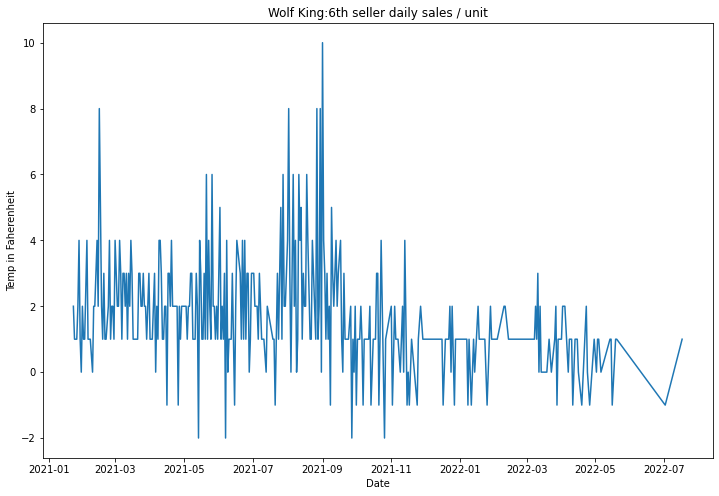

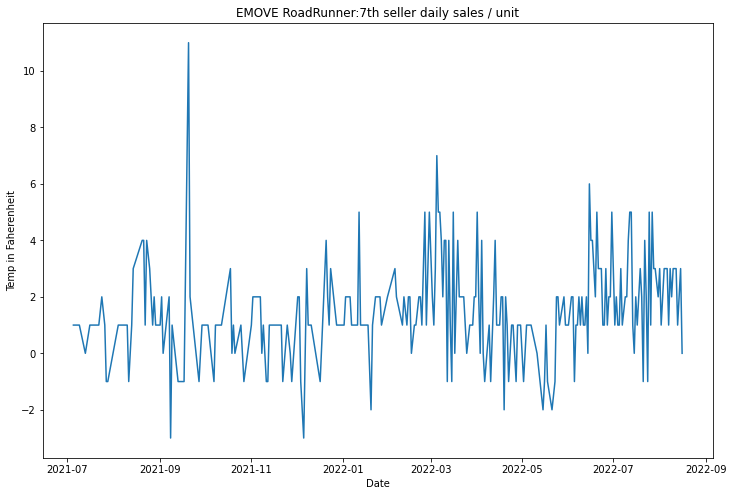

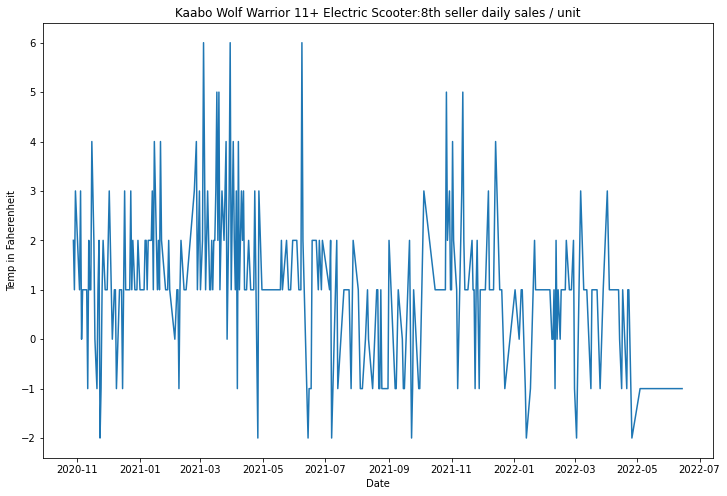

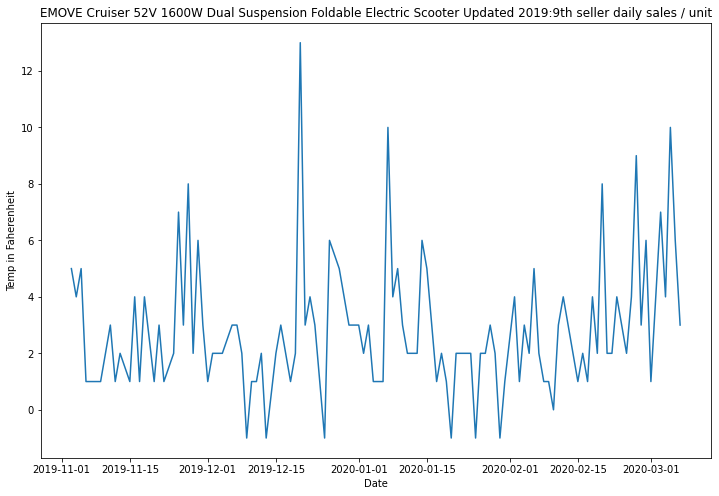

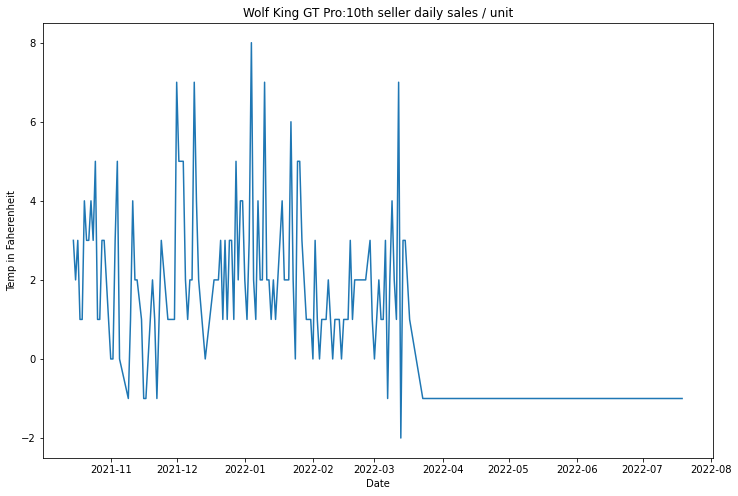

In [ ]:
for rank in range(10):
  rank_seller = ith_best_seller(rank)
  # Plot scatter
  fig = plt.figure(figsize=(12, 8))
  plt.plot(df[df['product_title'] == rank_seller]['date'], df[df['product_title'] == rank_seller]["net_quantity"])

  # Labelling 

  plt.xlabel("Date")
  plt.ylabel("Temp in Faherenheit")
  plt.title(rank_seller + ':' + str(rank+1) + 'th seller daily sales / unit')

  # Display
  plt.show()


In [ ]:
_### default_na 고쳐야함 --- 데이터 더 필요하기 때문. 근데 일단 cruiser 이런거 찾는데 방해되서 False로 킾

###date range
start_date = '2019-01-01'
end_date = '2022-08-15'
###
mask = (scooter_df['day'] > start_date) & (scooter_df['day'] <= end_date)
scooter_df = scooter_df.loc[mask]

#sort date
scooter_df['day'] = pd.to_datetime(scooter_df['day'])
scooter_df.sort_values(by='day', inplace = True)

###Select Model  === CRUISER only
cruiser = 'Cruiser' or "CRUISER"
cruiser_df = scooter_df[scooter_df['variant_sku'].str.contains('Cruiser|CRUISER')]
###


#Change Column Names
cruiser_df = cruiser_df.rename({'variant_sku': 'item_id', 'net_quantity': 'y', 'day': 'ds', 
                 'gross_sales': 'price', 'shipping_postal_code': 'location', 'product_vendor': 'brand'}, axis=1) 

#filter out no need data
cruiser_df = cruiser_df.drop(['discounts', 'returns', 'net_sales', 'taxes', 'total_sales'], axis=1)

#Order number greater than 0 - return/cancellation filtering
cruiser_df = cruiser_df[cruiser_df['y'] > 0]

#North America Order filtering
cruiser_df = cruiser_df[(cruiser_df['shipping_country'] == 'United States') | (cruiser_df['shipping_country'] == 'Canada')| (cruiser_df['shipping_country'].isna())]

#color 
black_df = cruiser_df[(cruiser_df['item_id'] == 'Cruiser-Orange') | (cruiser_df['item_id'] == 'CRUISER-Orange')]
black_df = black_df.groupby(by=['ds','item_id']).sum().groupby(level=[0]).cumsum()
black_df.reset_index(inplace=True)


print(black_df)

###
#more_series_df = scooter_df.drop(['demand', 'location', 'brand'], axis=1)
#meta_df = scooter_df.drop(['demand', 'location', 'timestamp', 'promotion_applied', 'location', 'price' ], axis=1)

# print(timeseries_df)
# print(more_series_df)
# print(meta_df)

            ds         item_id  y    price
0   2019-08-06  CRUISER-Orange  1  1399.00
1   2019-08-12  CRUISER-Orange  1  1399.00
2   2019-08-17  CRUISER-Orange  1  1399.00
3   2019-08-18  CRUISER-Orange  1  1399.00
4   2019-08-27  CRUISER-Orange  1  1399.00
..         ...             ... ..      ...
835 2022-08-10  CRUISER-Orange  3  4519.89
836 2022-08-11  CRUISER-Orange  2  2998.00
837 2022-08-13  CRUISER-Orange  3  4497.00
838 2022-08-14  CRUISER-Orange  1  1499.00
839 2022-08-15  CRUISER-Orange  3  4497.00

[840 rows x 4 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


# New Section

In [ ]:
#Seasonality

#Canada order zipcode
scooter_df.loc[scooter_df['shipping_country'] == 'Canada', 'location'] = '49868'

scooter_df.loc[scooter_df.discounts < 0, 'promotion_applied'] = 1
scooter_df.loc[scooter_df.discounts >= 0, 'promotion_applied'] = 0

scooter_df['promotion_applied'] = scooter_df['promotion_applied'].astype(int)

# timeseries_df = scooter_df.drop(['promotion_applied', 'price', 'brand'], axis=1)
# & (df['B']>0) & (df['C']>0)]
print(scooter_df[(scooter_df['promotion_applied'] == 0)].count()

# for index, i in timeseries_df[['location']].iterrows():
#     idx = timeseries_df['location'].str.find('-')
#     row = i[0]
#     print(idx[index])
#     if idx[index] == -1:
#         timeseries_df.loc[index, 'location'] = row[:-2]
#     else:
#         timeseries_df.loc[index, 'location'] = row[:idx[index]]
#         print(index)
#         timeseries_df.loc[index, 'location'] = row[:-2]

# timeseries_df['location'] = 'US_' + timeseries_df['location'] +'00'


# timeseries_df['location'].str.find('-')


SyntaxError: unexpected EOF while parsing (Temp/ipykernel_38476/1568160767.py, line 29)

In [ ]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
import os
import itertools
from prophet.diagnostics import performance_metrics
import joblib
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
##df_final contains input features, demand_df contains full dataset
##Split data in train and test
cruiser_df = black_df
###

train_percentage=80
train_final_index=round(len(cruiser_df)*(train_percentage/100))
cruiser_df_train = cruiser_df[0:train_final_index]
cruiser_df_test = cruiser_df[train_final_index:]
# X_train = 
# y_train = 
y_test = cruiser_df[['y']][train_final_index:]

print(cruiser_df_train)
print(cruiser_df_test)

            ds         item_id  y   price
0   2019-08-06  CRUISER-Orange  1  1399.0
1   2019-08-12  CRUISER-Orange  1  1399.0
2   2019-08-17  CRUISER-Orange  1  1399.0
3   2019-08-18  CRUISER-Orange  1  1399.0
4   2019-08-27  CRUISER-Orange  1  1399.0
..         ...             ... ..     ...
667 2022-01-21  CRUISER-Orange  1  1399.0
668 2022-01-23  CRUISER-Orange  1  1399.0
669 2022-01-24  CRUISER-Orange  1  1399.0
670 2022-01-25  CRUISER-Orange  1  1399.0
671 2022-01-26  CRUISER-Orange  3  4197.0

[672 rows x 4 columns]
            ds         item_id  y    price
672 2022-01-28  CRUISER-Orange  3  4197.00
673 2022-01-29  CRUISER-Orange  1  1399.00
674 2022-01-30  CRUISER-Orange  1  1399.00
675 2022-02-03  CRUISER-Orange  2  2798.00
676 2022-02-04  CRUISER-Orange  3  4197.00
..         ...             ... ..      ...
835 2022-08-10  CRUISER-Orange  3  4519.89
836 2022-08-11  CRUISER-Orange  2  2998.00
837 2022-08-13  CRUISER-Orange  3  4497.00
838 2022-08-14  CRUISER-Orange  1  1499.00

16:17:54 - cmdstanpy - INFO - Chain [1] start processing
16:17:55 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
835,2022-08-10,1.943769,-0.834995,5.308914,1.943769,1.943769,0.283306,0.283306,0.283306,-0.238014,-0.238014,-0.238014,0.521320,0.521320,0.521320,0.0,0.0,0.0,2.227075
836,2022-08-11,1.941526,-0.728314,5.483098,1.941526,1.941526,0.262046,0.262046,0.262046,-0.305073,-0.305073,-0.305073,0.567119,0.567119,0.567119,0.0,0.0,0.0,2.203572
837,2022-08-13,1.937040,-0.718132,5.715203,1.937040,1.937040,0.407192,0.407192,0.407192,-0.214649,-0.214649,-0.214649,0.621841,0.621841,0.621841,0.0,0.0,0.0,2.344232
838,2022-08-14,1.934797,-0.754897,5.780059,1.934797,1.934797,0.483966,0.483966,0.483966,-0.145152,-0.145152,-0.145152,0.629118,0.629118,0.629118,0.0,0.0,0.0,2.418763
839,2022-08-15,1.932554,-0.852137,5.975300,1.932554,1.932554,0.524795,0.524795,0.524795,-0.097690,-0.097690,-0.097690,0.622485,0.622485,0.622485,0.0,0.0,0.0,2.457349


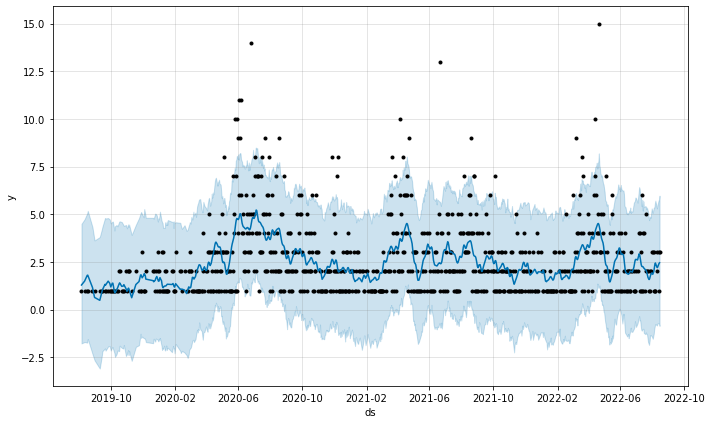

In [ ]:
model = Prophet(changepoint_prior_scale= 1, seasonality_prior_scale=5., holidays_prior_scale= 0.01, 
        yearly_seasonality=True, 
        weekly_seasonality= False,
        daily_seasonality=False, 
        interval_width=0.95)
model.add_seasonality(
        name='monthly', 
        period=30.5, 
        fourier_order=5
    )

# model.fit(cruiser_df_train)
# prediction = model.predict(cruiser_df_test)

model.fit(cruiser_df)
prediction = model.predict(cruiser_df)

# with open('fb_target_model.json', 'w') as fout:
#     json.dump(model_to_json(model), fout)df_future
    
# Plot error metrics
# print('Root Mean Squared Error:', np.sqrt(mean_squared_error(np.sum(y_test[-7:]), np.sum(prediction['yhat'][-7:]))))
# print('R2 score - ', r2_score(y_test[-7:], prediction['yhat'][-7:]))
model.plot(prediction)

prediction.tail()





In [ ]:
# seasonality regressor
# https://nbviewer.org/github/nicolasfauchereau/Auckland_Cycling/blob/master/notebooks/Auckland_cycling_and_weather.ipynb

In [ ]:
#save as CSV file

import os  
os.makedirs('./Order_data/Cruiser/', exist_ok=True) 
prediction.to_csv('./Order_data/Cruiser/prediction.csv', index=False) 
cruiser_df.to_csv('./Order_data/Cruiser/cruiser_df.csv', index=False) 


PermissionError: [Errno 13] Permission denied: './Order_data/Cruiser/prediction.csv'

In [ ]:
cruiser_df.to_csv('./Order_data/Cruiser/cruiser_df.csv', index=False) 

ValueError: invalid literal for int() with base 10: 'Date'

In [ ]:
#save as CSV file

import os  
os.makedirs('./Order_data/Cruiser/', exist_ok=True) 


timeseries_df.to_csv('./Order_data/Cruiser/timeseries_df.csv', index=False) 
more_series_df.to_csv('./Order_data/Cruiser/more_series_df.csv', index=False) 
meta_df.to_csv('./Order_data/Cruiser/meta_df.csv', index=False) 
